### Домашнее задание к лекции 1

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в конкретном регионе от времени,
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
    в) количество отказов компьютера,
    
    г) число обращений в поликлинику по району,
    
    д) координаты автобуса при движении по маршруту,
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.
    
РЕШЕНИЕ

а) Это точно временной ряд, так как четкео указано что есть данные по времени
    
б) Скорее всего это можно представить как временной ряд, так как скорость фиксируется с определенной периодичьостью во всем периоде полета

в) Тоже можно сказать что это временной ряд, так как каждый отказ имеет параметр времени события

г) Если в данных есть метки времени, то это тоже временной ряд

д) Так как координаты привязаны к меткам времени, то это тоже временной ряд

е) Так как кооржинаты меняются во времени, то это тоже можно представить как временной ряд

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

РЕШЕНИЕ

In [168]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

import datetime
datetime.datetime.strptime

from sklearn.metrics import mean_squared_error

import os

In [169]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [171]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


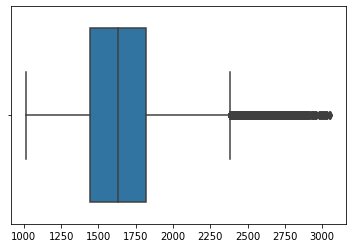

In [172]:
sns.boxplot(data.values)

In [173]:
# проверим пропуски
data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

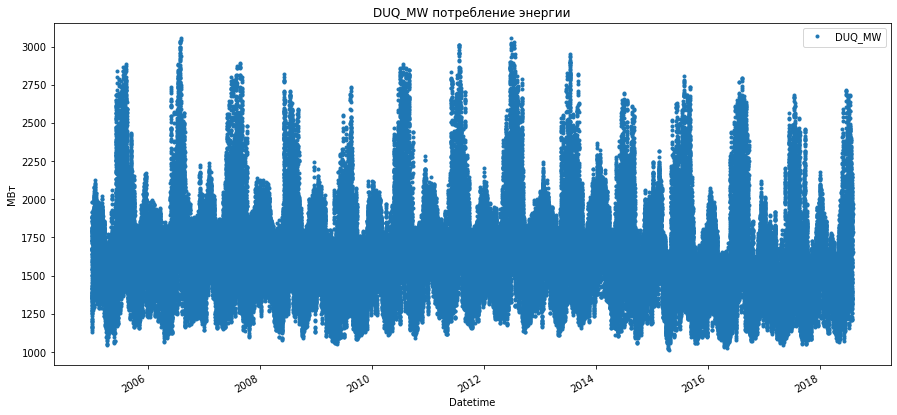

In [174]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ_MW потребление энергии' )
plt.ylabel ( 'МВт' )

В целом нормальный датасет,но смущает что распредеделение потребления имеет 2 пика в году, в конце лета и конце зимы, причем летом почему-то пик меньше в 2 раза. Хотя пик холода только зимой, о чем говорит график распределения среднегодовой температуры в Бостоне. 

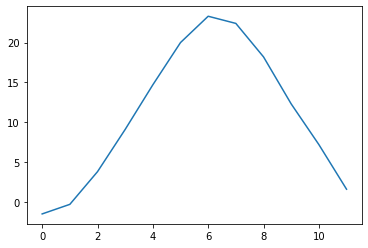

In [175]:
temp = [-1.5,-0.3,3.8,9.1,14.7,20.0,23.3,22.4,18.2,12.3,7.2,1.6]
avr_temp_boston = pd.DataFrame({"Средняя температура, °C":temp})
plt.plot(temp)

In [176]:
data['date'] = data.index
data_2008_10 = data['20080101':'20081230']

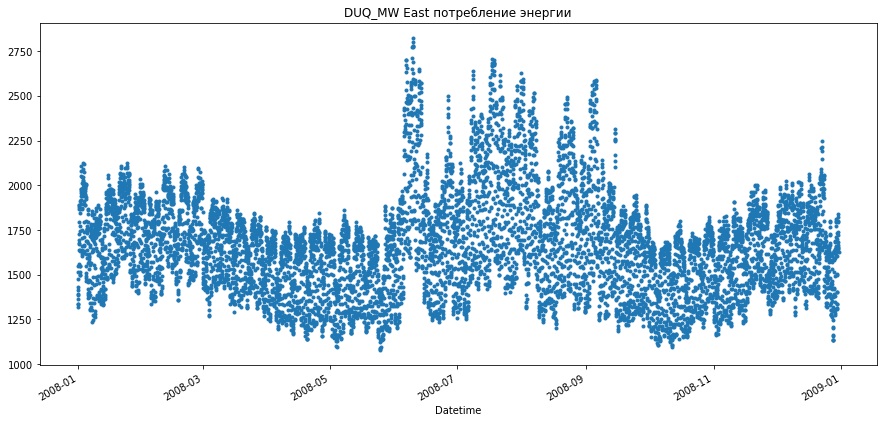

In [177]:
_ = data_2008_10['DUQ_MW'].plot( style='.', figsize=( 15, 7 ), title='DUQ_MW East потребление энергии' )

Значит причина не в холодном времени года или продолжительности светового дня, возможно тратится больше при кондиционировании? 

Непонятно пока, нужно разбираться с этим...

In [178]:
# Преобразуем значения в INT
data['DUQ_MW'] = data['DUQ_MW'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   DUQ_MW  119068 non-null  int64         
 1   date    119068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.7 MB


In [179]:
# проверим на дубликаты
ut = data['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


Теперь посчитаем уникальные значения в data для колонки 'data'

In [180]:
count_data = data['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

Видно, что 4 года подряд в начале ноября однажды вносили данные за день 2 раза. Это очевидно, не верно. Что происходило, следует уточнять у автора данных. В качестве предположения можно подумать о вариантах, например, переход на зимнее время и тогда, в марте -апреле должен быть пропуск. Проверим март-апрель 2015 года

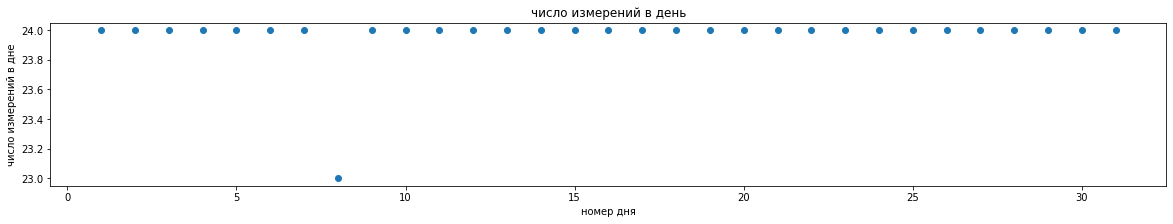

In [181]:
day_H=data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

Видим, что один из дней марта имеет меньше измерений, чем остальные. Определим номер этого дня используя подсчет числа измерений по дням и сравнение этой цифры с идеальным значением 24.

In [182]:
Day_count = day_H.value_counts() 
Day_count[Day_count != 24]

8    23
Name: Datetime, dtype: int64

Посмотрим на этот день поближе. После 2-го часа сразу наступил 4-й.

In [183]:
data['2015-03-08 01:00:00':'2015-03-08 06:00:00'].index

DatetimeIndex(['2015-03-08 01:00:00', '2015-03-08 02:00:00',
               '2015-03-08 04:00:00', '2015-03-08 05:00:00',
               '2015-03-08 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

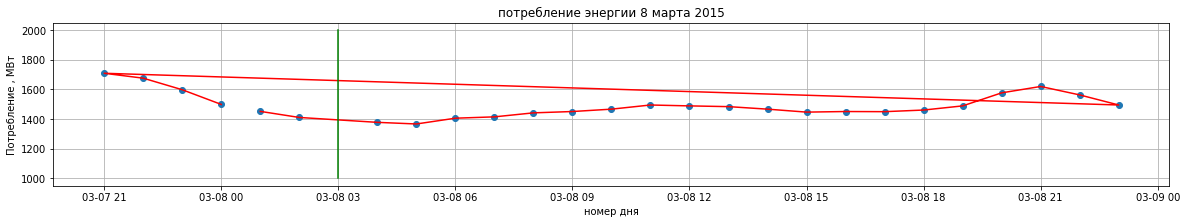

In [184]:
plt.figure(figsize=(20,3))
plt.plot(data['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'o')
plt.plot(data['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'r')
line_ = pd.to_datetime(pd.Series(['2015-03-08 03:00:00', '2015-03-08 03:00:00']))
plt.plot(line_,np.array([1000,2000]),'g')
plt.grid('on')
plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии 8 марта 2015')

plt.show()

Такой день в марте один - 8 марта 2015 :) . Гипотезу о переходе на летнее(зимнее) время можно считать доказанной. Найдем все такие аномалии по всему ряду.

выдвинутую гипотезу можно считать подтвержденной, т.к. очевидно, что есть разрыв в индексах. Эти разрывы необходимо пометить и преобразовать, пользуясь какой-либо общей идеей.

In [185]:
day_H=data['2014-03-01 00:00:00':'2014-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2014 = Day_count[Day_count != 24].index
d2014

Int64Index([9], dtype='int64')

In [186]:
day_H=data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2015 =Day_count[Day_count != 24].index
d2015

Int64Index([8], dtype='int64')

In [187]:
day_H=data['2016-03-01 00:00:00':'2016-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2016 =Day_count[Day_count != 24].index
d2016

Int64Index([13], dtype='int64')

In [188]:
day_H=data['2017-03-01 00:00:00':'2017-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2017 =Day_count[Day_count != 24].index
d2017

Int64Index([12], dtype='int64')

Попробуем решить проблему пропуска. Построим пропуск как интерполяцию между соседними метками. Поскольку наше измерение является "фейком", то его назначение должно быть обосновано характером ряда и его типовым поведением. Наш ряд имеет гладкий характер в часовых диапазонах. Построим пропуск как среднее по 2-м соседям.

In [189]:
v1 = list((data['2014-03-09 02:00:00']['DUQ_MW'].values + data['2014-03-09 04:00:00']['DUQ_MW'].values) / 2)
print(v1)
v2 = list((data['2015-03-08 02:00:00']['DUQ_MW'].values + data['2015-03-08 04:00:00']['DUQ_MW'].values) / 2)
v3 = list((data['2016-03-13 02:00:00']['DUQ_MW'].values + data['2016-03-13 04:00:00']['DUQ_MW'].values) / 2)
v4 = list((data['2017-03-12 02:00:00']['DUQ_MW'].values + data['2017-03-12 04:00:00']['DUQ_MW'].values) / 2)
v =np.reshape([v1[0],v2[0],v3[0],v4[0]],(4,1))
v

df_data = pd.DataFrame(index = pd.to_datetime(pd.Series(['2014-03-09 03:00:00','2015-03-08 03:00:00','2016-03-13 03:00:00','2017-03-12 03:00:00'])), columns =['DUQ_MW'] , data = v) 
df_data['date'] = df_data.index
df_data.head()
#
data = data.append(df_data,sort = False)
data.tail()
#data['2014-03-09 03:00:00'] 

[1415.0]


,DUQ_MW,date
2018-01-02 00:00:00,1721.0,2018-01-02 00:00:00
2014-03-09 03:00:00,1415.0,2014-03-09 03:00:00
2015-03-08 03:00:00,1394.5,2015-03-08 03:00:00
2016-03-13 03:00:00,1111.5,2016-03-13 03:00:00
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00


Уберем лишние точки (дублирование метки в индексах)

In [190]:
count_data.iloc[:4]

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
Name: date, dtype: int64

In [191]:
data.loc[count_data.iloc[:4].index]

,DUQ_MW,date
2017-11-05 02:00:00,1131.0,2017-11-05 02:00:00
2017-11-05 02:00:00,1105.0,2017-11-05 02:00:00
2014-11-02 02:00:00,1272.0,2014-11-02 02:00:00
2014-11-02 02:00:00,1240.0,2014-11-02 02:00:00
2015-11-01 02:00:00,1113.0,2015-11-01 02:00:00
2015-11-01 02:00:00,1138.0,2015-11-01 02:00:00
2016-11-06 02:00:00,1121.0,2016-11-06 02:00:00
2016-11-06 02:00:00,1107.0,2016-11-06 02:00:00


In [192]:
df = data.loc[count_data.iloc[:4].index]
df_ = df.groupby('date').mean()
df_['date'] = df_.index
print(df_)
print(df)
data.drop(count_data.iloc[:4].index)
data.shape

                     DUQ_MW                date
date                                           
2014-11-02 02:00:00  1256.0 2014-11-02 02:00:00
2015-11-01 02:00:00  1125.5 2015-11-01 02:00:00
2016-11-06 02:00:00  1114.0 2016-11-06 02:00:00
2017-11-05 02:00:00  1118.0 2017-11-05 02:00:00
                     DUQ_MW                date
2017-11-05 02:00:00  1131.0 2017-11-05 02:00:00
2017-11-05 02:00:00  1105.0 2017-11-05 02:00:00
2014-11-02 02:00:00  1272.0 2014-11-02 02:00:00
2014-11-02 02:00:00  1240.0 2014-11-02 02:00:00
2015-11-01 02:00:00  1113.0 2015-11-01 02:00:00
2015-11-01 02:00:00  1138.0 2015-11-01 02:00:00
2016-11-06 02:00:00  1121.0 2016-11-06 02:00:00
2016-11-06 02:00:00  1107.0 2016-11-06 02:00:00


(119072, 2)

Удалим дубликаты

In [193]:
data.drop_duplicates()
data.shape

(119072, 2)

In [194]:
data = data.append(df_,sort = False)
data.tail()

,DUQ_MW,date
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00
2014-11-02 02:00:00,1256.0,2014-11-02 02:00:00
2015-11-01 02:00:00,1125.5,2015-11-01 02:00:00
2016-11-06 02:00:00,1114.0,2016-11-06 02:00:00
2017-11-05 02:00:00,1118.0,2017-11-05 02:00:00


Обратим внимание еще на один момент. На рис.4 странное соединение точек : 23 часа соединены с 0 часов 8.03.2015. Посмотрим на другие дни по такой же схеме.

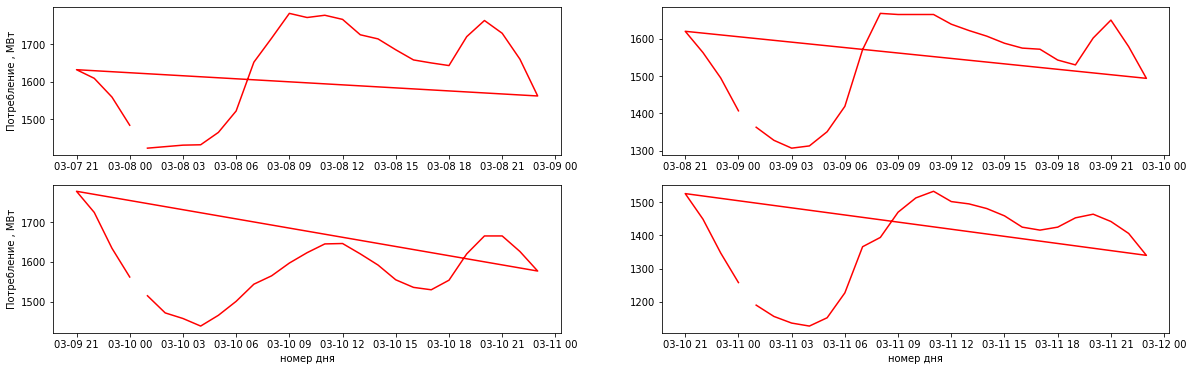

In [195]:
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
plt.plot(data['2010-03-07 21:00:00':'2010-03-8 23:00:00'].index,data['2010-03-07 21:00:00':'2010-03-08 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')

plt.subplot(2,2,2)
plt.plot(data['2015-03-08 21:00:00':'2015-03-9 23:00:00'].index,data['2015-03-08 21:00:00':'2015-03-09 23:00:00']['DUQ_MW'].values, 'r')

plt.subplot(2,2,3)
plt.plot(data['2012-03-09 21:00:00':'2012-03-10 23:00:00'].index,data['2012-03-09 21:00:00':'2012-03-10 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')
plt.xlabel('номер дня')

plt.subplot(2,2,4)
plt.plot(data['2016-03-10 21:00:00':'2016-03-11 23:00:00'].index,data['2016-03-10 21:00:00':'2016-03-11 23:00:00']['DUQ_MW'].values, 'r')
plt.xlabel('номер дня')

plt.show()

Результат ревизии нескольких дней показывает, что это постоянная картина для всего ряда. Причина в реверсивном способе дописывания дневных данных

In [196]:
data.iloc[19:26,:]

,DUQ_MW,date
2005-12-31 20:00:00,1737.0,2005-12-31 20:00:00
2005-12-31 21:00:00,1726.0,2005-12-31 21:00:00
2005-12-31 22:00:00,1669.0,2005-12-31 22:00:00
2005-12-31 23:00:00,1592.0,2005-12-31 23:00:00
2006-01-01 00:00:00,1493.0,2006-01-01 00:00:00
2005-12-30 01:00:00,1484.0,2005-12-30 01:00:00
2005-12-30 02:00:00,1419.0,2005-12-30 02:00:00


Данные записаны между 31.12 и 30.12. Принципиально при оценке статистики это не очень страшно, но порядок передачи информации важен, когда мы начинаем рассматривать данные по порядку записи и отображать их на график. Для исключения нарушения порядка проведем сортировку по индексу время-дата. 

In [197]:
data = data.sort_index()

In [198]:
data.iloc[19:26,:]

,DUQ_MW,date
2005-01-01 20:00:00,1546.0,2005-01-01 20:00:00
2005-01-01 21:00:00,1541.0,2005-01-01 21:00:00
2005-01-01 22:00:00,1534.0,2005-01-01 22:00:00
2005-01-01 23:00:00,1497.0,2005-01-01 23:00:00
2005-01-02 00:00:00,1389.0,2005-01-02 00:00:00
2005-01-02 01:00:00,1251.0,2005-01-02 01:00:00
2005-01-02 02:00:00,1204.0,2005-01-02 02:00:00


Теперь навели порядок в данных и посмотрим на них еще раз

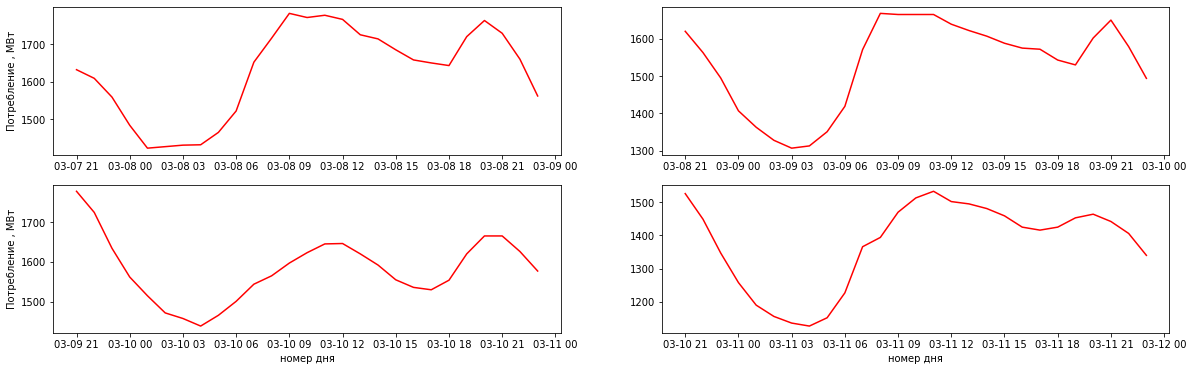

In [199]:
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
plt.plot(data['2010-03-07 21:00:00':'2010-03-8 23:00:00'].index,data['2010-03-07 21:00:00':'2010-03-08 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')

plt.subplot(2,2,2)
plt.plot(data['2015-03-08 21:00:00':'2015-03-9 23:00:00'].index,data['2015-03-08 21:00:00':'2015-03-09 23:00:00']['DUQ_MW'].values, 'r')

plt.subplot(2,2,3)
plt.plot(data['2012-03-09 21:00:00':'2012-03-10 23:00:00'].index,data['2012-03-09 21:00:00':'2012-03-10 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')
plt.xlabel('номер дня')

plt.subplot(2,2,4)
plt.plot(data['2016-03-10 21:00:00':'2016-03-11 23:00:00'].index,data['2016-03-10 21:00:00':'2016-03-11 23:00:00']['DUQ_MW'].values, 'r')
plt.xlabel('номер дня')

plt.show()

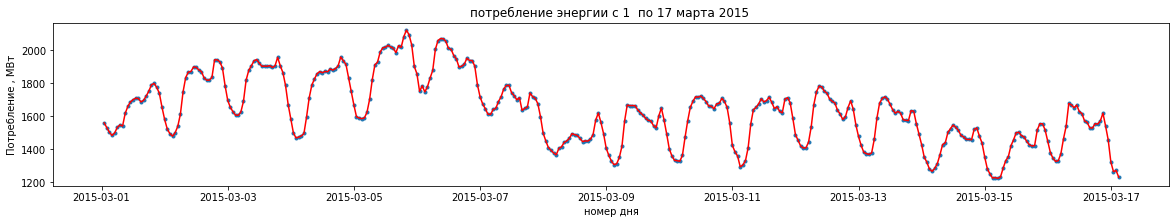

In [200]:
plt.figure(figsize=(20,3))
plt.plot(data['2015-03-01 01:00:00':'2015-03-17 03:00:00'].index,data['2015-03-01 01:00:00':'2015-03-17 03:00:00']['DUQ_MW'].values, '.')
plt.plot(data['2015-03-01 01:00:00':'2015-03-17 03:00:00'].index,data['2015-03-01 01:00:00':'2015-03-17 03:00:00']['DUQ_MW'].values, 'r')

plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии с 1  по 17 марта 2015 ')
plt.show()

Итак:

     - ряд исправлен,
     - все дни и часы заполнены,
     - все похоже на правду.

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.


РЕШЕНИЕ

## Brent 2010-2019
Перейдем к анализу второго примера. Цена нефти марки Brent (https://investfunds.ru/indexes/624/)
Данные из набора содержат дневные цены за период от 2010 до 2019 .

In [201]:
# print(os.listdir())
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head(10)

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59
2019-08-26,58.26
2019-08-25,57.81
2019-08-23,58.94
2019-08-22,60.05


In [202]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  2667 non-null   float64
dtypes: float64(1)
memory usage: 41.7 KB


In [203]:
brent_data.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


In [204]:
brent_data[brent_data['Значение'].isnull()].count()

Значение    0
dtype: int64

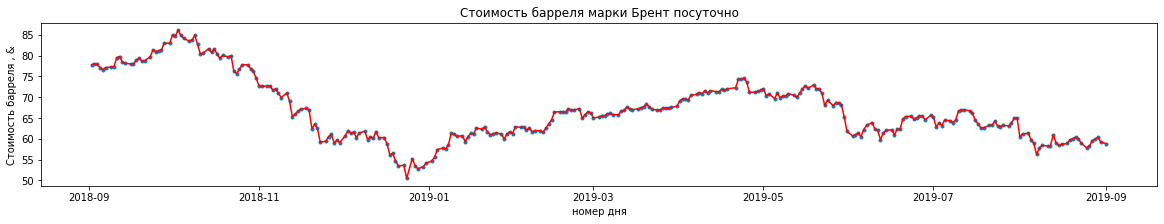

In [216]:
plt.figure(figsize=(20,3))
df = brent_data['20190901':'20180901']
plt.plot(df.index,df.values, '.')
plt.plot(df.index,df.values, 'r')

plt.xlabel('номер дня')
plt.ylabel('Стоимость барреля , &')
plt.title('Стоимость барреля марки Брент посуточно')
plt.show()

In [270]:
monthly_brent_data = brent_data.copy()
monthly_brent_data = monthly_brent_data.resample('M').mean()

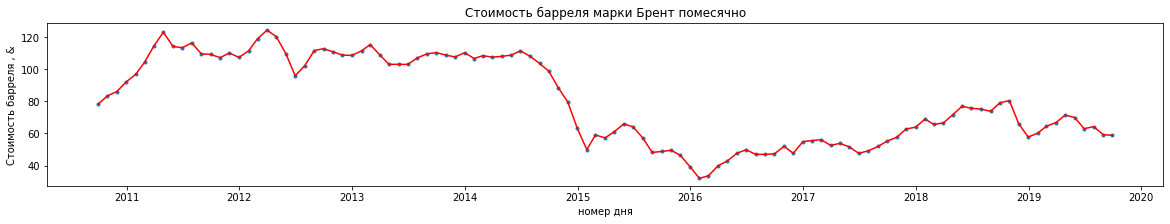

In [271]:
plt.figure(figsize=(20,3))
plt.plot(monthly_brent_data.index,monthly_brent_data.values, '.')
plt.plot(monthly_brent_data.index,monthly_brent_data.values, 'r')

plt.xlabel('номер дня')
plt.ylabel('Стоимость барреля , &')
plt.title('Стоимость барреля марки Брент помесячно')
plt.show()

In [264]:
monthly_brent_data = brent_data.copy()
monthly_brent_data = monthly_brent_data.resample('M').std()

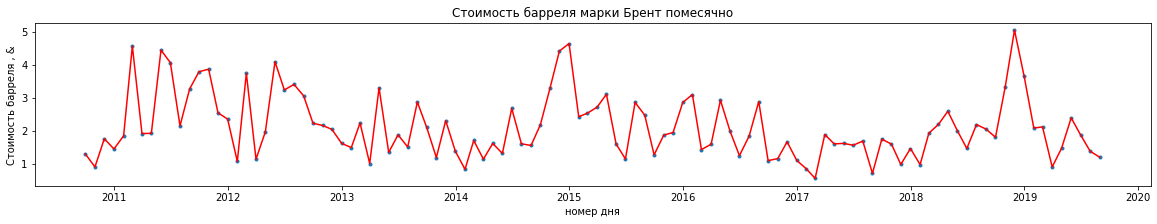

In [265]:
plt.figure(figsize=(20,3))
plt.plot(monthly_brent_data.index,monthly_brent_data.values, '.')
plt.plot(monthly_brent_data.index,monthly_brent_data.values, 'r')

plt.xlabel('номер дня')
plt.ylabel('Стоимость барреля , &')
plt.title('Стоимость барреля марки Брент помесячно')
plt.show()

In [261]:
weekly_brent_data = brent_data.copy()
weekly_brent_data = weekly_brent_data.resample('W').mean()

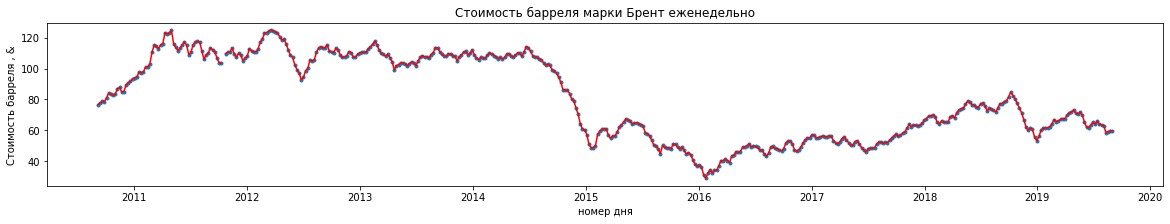

In [262]:
plt.figure(figsize=(20,3))
plt.plot(weekly_brent_data.index,weekly_brent_data.values, '.')
plt.plot(weekly_brent_data.index,weekly_brent_data.values, 'r')

plt.xlabel('номер дня')
plt.ylabel('Стоимость барреля , &')
plt.title('Стоимость барреля марки Брент еженедельно')
plt.show()

In [266]:
weekly_brent_data = brent_data.copy()
weekly_brent_data = weekly_brent_data.resample('W').std()

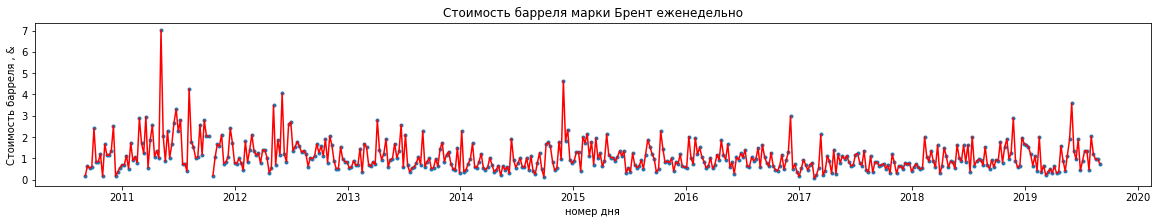

In [267]:
plt.figure(figsize=(20,3))
plt.plot(weekly_brent_data.index,weekly_brent_data.values, '.')
plt.plot(weekly_brent_data.index,weekly_brent_data.values, 'r')

plt.xlabel('номер дня')
plt.ylabel('Стоимость барреля , &')
plt.title('Стоимость барреля марки Брент еженедельно')
plt.show()

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

РЕШЕНИЕ

Графики стали более грубыми, так как уменьшилось количество реперных точек